## Project: House Prices Prediction (Multiple Linear Regression)
**Author:** Fawaz  
**Date:** January 2026  

### Aim
To build a **multiple linear regression model** that predicts `house_price` based on variables such as `lot_size`, `bedrooms`, `bathrooms`, `Garden_size`, etc. This analysis aims to identify the strongest predictors of house prices.

### Relevant Dataset Columns
* `Lot_Size`: Land area
* `House_Age`: Older homes tend to be cheaper.
* `Bedrooms`: More bedrooms generally increase price.
* `Distance_to_CityCenter`: The further this is, the cheaper the house should be.
* `Nearby_Schools`: More schools should increase prices
* `Crime_Rate`: The higher the crime rate, the cheaper the house
* etc.
* **Target:** `House_Price` (in 1,000s)


In [1]:
# Setup
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, minmax_scale

# Inference & Diagnostics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Utilities
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("house_prices_portfolio.csv")
df.head()

,House_Price,Lot_Size,Bedrooms,Bathrooms,House_Age,Distance_to_CityCenter,Crime_Rate,Nearby_Schools,Monthly_Income,Renovated,Energy_Efficiency_Score,Garden_Size,Noise_Level
0,89.96,2000,3,3,45,8.25,70.22,6,4158.35,0,56.29,125.1,8.38
1,9.92,1256,2,2,45,23.82,68.95,7,5658.32,1,80.23,136.6,3.99
2,175.77,2000,7,5,38,3.45,72.10,8,4652.73,0,60.33,375.4,8.45
3,57.77,2000,2,2,35,7.27,93.98,4,2381.04,0,44.46,308.8,8.45
4,74.11,913,3,3,7,8.87,89.90,6,2527.46,1,50.01,260.5,7.66


#### Exploratory Data Analysis

In [3]:
# Data contains no null values for all columns, so no data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   House_Price              500 non-null    float64
 1   Lot_Size                 500 non-null    int64  
 2   Bedrooms                 500 non-null    int64  
 3   Bathrooms                500 non-null    int64  
 4   House_Age                500 non-null    int64  
 5   Distance_to_CityCenter   500 non-null    float64
 6   Crime_Rate               500 non-null    float64
 7   Nearby_Schools           500 non-null    int64  
 8   Monthly_Income           500 non-null    float64
 9   Renovated                500 non-null    int64  
 10  Energy_Efficiency_Score  500 non-null    float64
 11  Garden_Size              500 non-null    float64
 12  Noise_Level              500 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 50.9 KB


In [4]:
df.shape

(500, 13)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
House_Price,500.0,98.98948,44.772335,-41.29,69.6650,99.385,129.3425,334.62
Lot_Size,500.0,1690.90400,342.192294,736.00,1431.5000,1810.000,2000.0000,2000.00
Bedrooms,500.0,3.97400,1.631763,1.00,3.0000,4.000,5.0000,7.00
Bathrooms,500.0,3.06000,1.584115,1.00,2.0000,3.000,4.0000,6.00
House_Age,500.0,33.88800,19.538346,0.00,17.0000,34.000,50.0000,69.00
Distance_to_CityCenter,500.0,8.94238,5.910477,1.42,5.0175,7.460,11.1600,40.00
Crime_Rate,500.0,70.79916,13.476801,25.32,61.7900,71.085,81.1850,95.00
Nearby_Schools,500.0,6.67000,2.105699,2.00,5.0000,7.000,8.0000,14.00
Monthly_Income,500.0,4514.20640,1492.544152,1500.00,3409.3700,4510.395,5487.3700,8767.94
Renovated,500.0,0.29200,0.455138,0.00,0.0000,0.000,1.0000,1.00


In [6]:
# Correlation

corr = df.corr()['House_Price'].sort_values()
corr

Crime_Rate                -0.490324
Distance_to_CityCenter    -0.409821
House_Age                 -0.272099
Renovated                  0.135616
Garden_Size                0.144462
Lot_Size                   0.179512
Noise_Level                0.325410
Energy_Efficiency_Score    0.350907
Monthly_Income             0.384082
Nearby_Schools             0.403098
Bathrooms                  0.492771
Bedrooms                   0.525954
House_Price                1.000000
Name: House_Price, dtype: float64

In [7]:
corr = df.corr()
corr

,House_Price,Lot_Size,Bedrooms,Bathrooms,House_Age,Distance_to_CityCenter,Crime_Rate,Nearby_Schools,Monthly_Income,Renovated,Energy_Efficiency_Score,Garden_Size,Noise_Level
House_Price,1.000000,0.179512,0.525954,0.492771,-0.272099,-0.409821,-0.490324,0.403098,0.384082,0.135616,0.350907,0.144462,0.325410
Lot_Size,0.179512,1.000000,0.063571,0.030610,0.053722,0.019590,0.056230,-0.080179,-0.051788,-0.017036,-0.065431,0.456832,-0.045337
Bedrooms,0.525954,0.063571,1.000000,0.884418,0.022977,0.007983,-0.069296,0.079151,0.076328,-0.011344,0.051116,0.033587,-0.029483
Bathrooms,0.492771,0.030610,0.884418,1.000000,0.021002,0.021335,-0.052858,0.058216,0.073688,-0.007671,0.048782,0.010777,-0.049570
House_Age,-0.272099,0.053722,0.022977,0.021002,1.000000,0.145725,0.077111,-0.050730,-0.039440,-0.024710,-0.044313,0.066894,-0.112119
Distance_to_CityCenter,-0.409821,0.019590,0.007983,0.021335,0.145725,1.000000,0.328818,-0.254790,0.011865,0.027551,0.001232,-0.024033,-0.883563
Crime_Rate,-0.490324,0.056230,-0.069296,-0.052858,0.077111,0.328818,1.000000,-0.755666,-0.868841,-0.306805,-0.757887,0.041200,-0.284605
Nearby_Schools,0.403098,-0.080179,0.079151,0.058216,-0.050730,-0.254790,-0.755666,1.000000,0.760641,0.295212,0.671172,-0.078793,0.232277
Monthly_Income,0.384082,-0.051788,0.076328,0.073688,-0.039440,0.011865,-0.868841,0.760641,1.000000,0.367611,0.865443,-0.076503,-0.009697
Renovated,0.135616,-0.017036,-0.011344,-0.007671,-0.024710,0.027551,-0.306805,0.295212,0.367611,1.000000,0.564241,0.018364,-0.035251


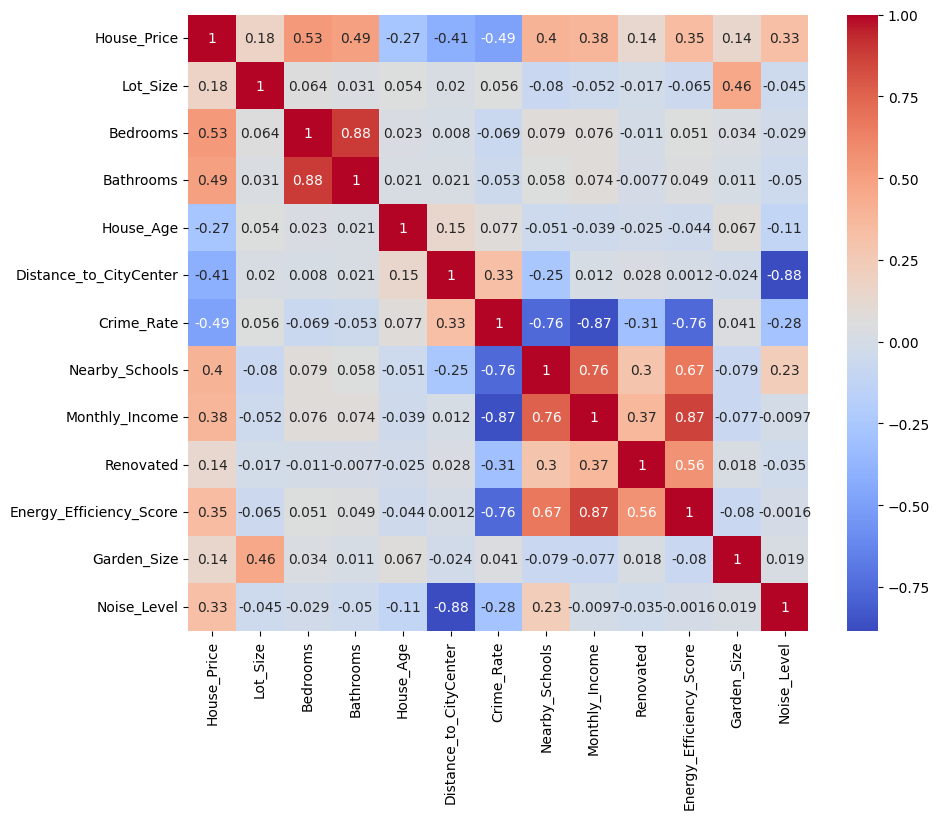

In [8]:
plt.figure(figsize = (10, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### Data Preprocessing & Model Training

In [9]:
X = df.drop('House_Price', axis='columns')
y = df['House_Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(400, 12)

In [12]:
lr = LinearRegression()

lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [13]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [14]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [15]:
print(f"Train MSE: {mse_train:.3f} | Test MSE: {mse_test:.3f}")
print(f"Train RMSE: {rmse_train:.3f} | Test RMSE: {rmse_test:.3f}")
print(f"Train R2_Score: {r2_train:.3f} | Test R2_Score: {r2_test:.3f}")

Train MSE: 630.247 | Test MSE: 818.373
Train RMSE: 25.105 | Test RMSE: 28.607
Train R2_Score: 0.694 | Test R2_Score: 0.533


#### Inference & OLS with Statmodels

In [16]:
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House_Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     73.03
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.50e-91
Time:                        01:20:36   Log-Likelihood:                -1856.8
No. Observations:                 400   AIC:                             3740.
Df Residuals:                     387   BIC:                             3791.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      42.3895     33.988      1.247      0.213     -24.435     109.214
Lot_Size                    0.0184      0.004      4.326      0.000       0.010       0.027
Bedrooms                    8.3121      1.707      4.870      0.000       4.956      11.668
Bathrooms                   5.8201      1.767      3.294      0.001       2.346       9.294
House_Age                  -0.5409      0.066     -8.168      0.000      -0.671      -0.411
Distance_to_CityCenter     -3.1276      0.516     -6.059      0.000      -4.143      -2.113
Crime_Rate                 -0.3959      0.268     -1.475      0.141      -0.924       0.132
Nearby_Schools              0.0559      1.029      0.054      0.957      -1.967       2.079
Monthly_Income              0.0033      0.003      1.121      0.263      -0.003       0.009
Renovated                  -2.2102      3.633     -0.608      0.543      -9.353       4.932
Energy_Efficiency_Score     0.6715      0.265      2.529      0.012       0.150       1.193
Garden_Size                 0.0442      0.013      3.490      0.001       0.019       0.069
Noise_Level                -2.2623      1.753     -1.290      0.198      -5.709       1.184
==============================================================================
Omnibus:                      104.577   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.206
Skew:                           0.924   Prob(JB):                    1.09e-151
Kurtosis:                       9.189   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Testing A Basic Assumption of Linear Regression

In [17]:
# Checking for the normality of residuals
fitted = y_train_pred
residuals = y_train - fitted

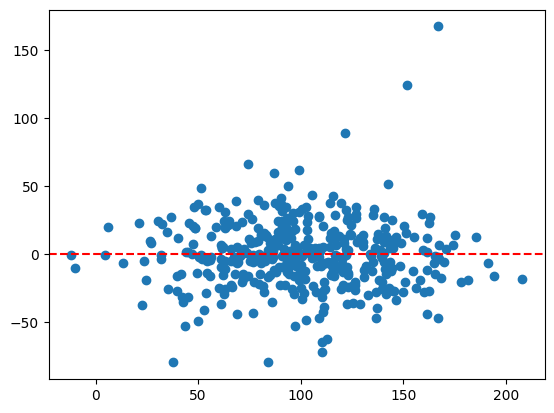

In [18]:
plt.scatter(fitted, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.show()

#### Regularisation (Ridge & Lasso)

In [19]:
# Scaling the data...
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Fitting with both Ridge & Lasso
ridge = Ridge(alpha=0.8, random_state=42)
lasso = Lasso(alpha=0.0001, random_state=42, max_iter=100000)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

lasso_train_pred = lasso.predict(X_train_scaled)
lasso_test_pred = lasso.predict(X_test_scaled)

In [21]:
print("Lasso Train R2", r2_score(y_train, lasso_train_pred))
print("Lasso Test R2", r2_score(y_test, lasso_test_pred))

Lasso Train R2 0.6936659818816076
Lasso Test R2 0.5334738544083213


In [22]:
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns).sort_values()
print(lasso_coefs)

Distance_to_CityCenter    -18.820791
House_Age                 -10.621666
Crime_Rate                 -5.468262
Noise_Level                -3.499901
Renovated                  -1.012565
Nearby_Schools              0.120119
Monthly_Income              4.997052
Garden_Size                 5.132048
Lot_Size                    6.341321
Energy_Efficiency_Score     8.007071
Bathrooms                   9.340824
Bedrooms                   13.821420
dtype: float64


In [23]:
# For Ridge
ridge_train_pred = ridge.predict(X_train_scaled)
ridge_test_pred = ridge.predict(X_test_scaled)

# Metrics for Ridge
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

# Metrics for Lasso
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)


In [24]:
# Creating a comparison table
comparison = pd.DataFrame({
    'Model': ['Ridge', 'Lasso'],
    'Train R²': [ridge_train_r2, lasso_train_r2],
    'Test R²': [ridge_test_r2, lasso_test_r2],
    'Train MSE': [ridge_train_mse, lasso_train_mse],
    'Test MSE': [lasso_test_mse, lasso_test_mse],
    'R² Difference': [ridge_train_r2 - ridge_test_r2, 
                     lasso_train_r2 - lasso_test_r2]
})

print(comparison)

   Model  Train R²   Test R²   Train MSE    Test MSE  R² Difference
0  Ridge  0.693660  0.533712  630.259166  818.369542       0.159948
1  Lasso  0.693666  0.533474  630.247134  818.369542       0.160192


#### Predicting the house price for a new house with all 12 predictor variables

In [26]:
new_house = pd.DataFrame({
    'Lot_Size': [1500],           # Land Area
    'Bedrooms': [3],              # Number of bedrooms
    'Bathrooms': [2],             # Number of bathrooms
    'House_Age': [10],            # Age of house in years
    'Distance_to_CityCenter': [5],# Km
    'Crime_Rate': [30],           # Index 0-100
    'Nearby_Schools': [8],        # Number of schools nearby
    'Monthly_Income': [4500],     # Avg neighborhood income
    'Renovated': [1],             # 0 = No, 1 = Yes
    'Energy_Efficiency_Score': [75],
    'Garden_Size': [200],
    'Noise_Level': [4]
})

# Using the standard Linear Regression model...
predicted_price = lr.predict(new_house)

print(f"Predicted House Price: ${predicted_price[0]:,.2f}")

Predicted House Price: $137.01
